https://www.tensorflow.org/get_started/get_started
https://www.tensorflow.org/get_started/mnist/beginners

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

# Tensorflow core (low level API)

Two steps:

1) building a graph

2) running the graph

Computational graph is made of nodes each performing a defined operation.

In [9]:
n1 = tf.constant(3, dtype = tf.float32) # constant node (no input)
n2 = tf.constant(4, dtype = tf.float32)
print(n1)

Tensor("Const_9:0", shape=(), dtype=float32)


In [13]:
sesh = tf.Session() # session for executing the graph
output = sesh.run([n1, n2])
print(output)

[3.0, 4.0]


In [16]:
n3 = tf.add(n1, n2) # node adding two values together
print({'n3' : n3})
output_add = sesh.run(n3)
print(output_add)

{'n3': <tf.Tensor 'Add_1:0' shape=() dtype=float32>}
7.0


In [21]:
a = tf.placeholder(tf.float32) # placeholder represents a parametrized input, providing an exact value later
b = tf.placeholder(tf.float32)
n4 = a + b # equivalent to tf.add(a, b)
print(sesh.run(n4, {a : 2, b : 2}))
print(sesh.run(n4, {a : [2, 2, 6], b : [1, 2, 3]})) # "vectorized" input

4.0
[ 3.  4.  9.]


In [23]:
n5 = (a + b) * 3
print(sesh.run(n5, {a : [2, 2, 6], b : [1, 2, 3]}))

[  9.  12.  27.]


In [37]:
w = tf.Variable([ .3], dtype = tf.float32) # varibles represents trainable parameters of a graph (weights, biases etc...)
b = tf.Variable([-.3], dtype = tf.float32)
x = tf.placeholder(tf.float32) # data input
lm = w * x + b # linear model

# to initiliaze thev ariables, you run:
init = tf.global_variables_initializer()
sesh.run(init)

# to run the model:
print(sesh.run(lm, {x : [1, 2, 3, 4]}))

[ 0.          0.30000001  0.60000002  0.90000004]


In [39]:
y = tf.placeholder(tf.float32) # desired values

# defining loss function (how far the model and y are apart):
squared_deltas = tf.square(lm - y) # squared diffenrences
loss = tf.reduce_sum(squared_deltas) # sum to get a scalar output value

print(sesh.run(loss, {x : [1, 2, 3, 4], y : [0, -1, -2, -3]})) # loss value for y = [0, -1, -2, -3]

23.66


In [46]:
w_new = tf.assign(w, [-1]) # change the parameters
b_new = tf.assign(b, [ 1]) 
print(sesh.run([w_new, b_new]))
print(sesh.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]})) # new loss

[array([-1.], dtype=float32), array([ 1.], dtype=float32)]
0.0


In [48]:
# train to optimize the loss function
learning_rate = 0.01
# automatically computes the partial derivatives from the model description
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

sesh.run(init) # to reset variables

for i in range(1000): # train is connected to the loss, the loss is connected to the lam
    sesh.run(train, {x : [1, 2, 3, 4], y : [0, -1, -2, -3]})
    
print(sesh.run([w, b])) # new parameters

[array([-0.9999969], dtype=float32), array([ 0.99999082], dtype=float32)]


# tf.estimator (high level API)

In [61]:
# declare list of features, our model has only one numeric feature x, (shape = [1])
feature_columns = [tf.feature_column.numeric_column("x", shape = [1])]

# estimator is an front end interface
estimator = tf.estimator.LinearRegressor(feature_columns = feature_columns)

# setting up training and evaluation datasets:
x_train = np.array([ 1,     2,    3,  4])
y_train = np.array([ 0,    -1,   -2, -3])
x_eval  = np.array([ 2,     5,    8,  1])
y_eval  = np.array([-1.01, -4.1, -7,  0])

# define size of the batches and number of batches (epochs)
input_fn = tf.contrib.learn.io.numpy_input_fn({"x": x_train}, y_train, batch_size = 4, 
                                                                       num_epochs = None, 
                                                                       shuffle = True)

train_input_fn = tf.contrib.learn.io.numpy_input_fn({"x": x_train}, y_train, batch_size = 4, 
                                                                             num_epochs = 1000, 
                                                                             shuffle = False)

eval_input_fn = tf.contrib.learn.io.numpy_input_fn({"x": x_eval}, y_eval, batch_size = 4, 
                                                                          num_epochs = 1000, 
                                                                          shuffle = False)
# train for 1000 steps
estimator.train(input_fn=input_fn, steps = 1000)

# evaluate the results
train_metrics = estimator.evaluate(input_fn=train_input_fn)
eval_metrics = estimator.evaluate(input_fn=eval_input_fn)
print("train metrics: " + str(train_metrics))
print("eval metrics: " + str(eval_metrics))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Jan\\AppData\\Local\\Temp\\tmpg6fuzpmo', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Jan\AppData\Local\Temp\tmpg6fuzpmo\model.ckpt.
INFO:tensorflow:loss = 14.0, step = 1
INFO:tensorflow:global_step/sec: 1101.64
INFO:tensorflow:loss = 0.158421, step = 101 (0.091 sec)
INFO:tensorflow:global_step/sec: 1173.29
INFO:tensorflow:loss = 0.0259584, step = 201 (0.086 sec)
INFO:tensorflow:global_step/sec: 1135.54
INFO:tensorflow:loss = 0.0107812, step = 301 (0.088 sec)
INFO:tensorflow:global_step/sec: 1161.86
INFO:tensorflow:loss = 0.00192279, step = 401 (0.087 sec)
INFO:tensorflow:global_step/sec: 1175.55
INFO:tenso

# MNIST

In [62]:
# get the data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [82]:
# mnist.train.images (x) 55000 x 784 tensor
# mnist.train.labels (y) 55000 x  10 tensor
print(mnist.train.labels[5]) # 1 at index 8: digit eight "one-hot vector"
print(len(mnist.train.images[1])) # 784: 28 by 28 flattened
print(mnist.train.images[1].mean()) # mean pixel intensity (1 == 255)

[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
784
0.151681


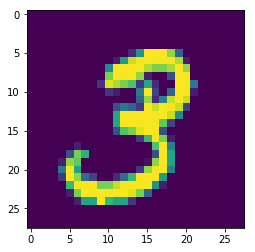

In [89]:
plt.imshow(np.resize(mnist.train.images[1], [28, 28]))
plt.show()

In [91]:
# input is an array of any length (None) containing arrays of length 784
x = tf.placeholder(tf.float32, [None, 784])

# weights and biases
w = tf.Variable(tf.zeros([784, 10])) # 784 weights (for each pixel) for each digit
b = tf.Variable(tf.zeros([10])) # one bias for each digiht

# wx + b produces [10] 1-D tensor for each image
y = tf.nn.softmax(tf.matmul(x, w) + b) # matmul is matrix multiplication

# loss function is cross-entropy
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices = [1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [98]:
sesh = tf.InteractiveSession()
tf.global_variables_initializer().run()
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100) # get new batches for x, and y
  sesh.run(train_step, feed_dict = {x : batch_xs, y_ : batch_ys})

In [109]:
estimate = tf.argmax(y, 1) # index (digit) with highest probability for each image (argmax alongside dim 1 of tensor y)
true = tf.argmax(y_, 1) # true labels
correct_prediction = tf.equal(true, estimate)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sesh.run(accuracy, feed_dict = {x : mnist.test.images, y_ : mnist.test.labels}))

0.9161
